<a href="https://colab.research.google.com/github/celelunar/News-Multiclass-Classification/blob/main/Multiclass%20Classification%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Diva Nabila Henryka
<br>
NIM: 2501975620

---

### Install and Import Libraries Needed

There are, in total, 8 libraries used in this news classification task. Those libraries are:
1. Pandas - to do DataFrame manipulation.
2. NumPy - to do arrays manipulation.
3. Tabulate - to print table.
4. RE - to check if a string matches the given regular expression and to substitue it (remove punctuations, numbers, extra whitespaces, etc.)
5. Unidecode - to normalize any accents characters.
6. NLTK
  * punkt - to tokenize sentences and words.
  * word_tokenize - to tokenize a string into words.
  * stopwords - to provide a list of common stopwords, which then will be removed from the text articles.
  * WordNetLemmatizer - to lemmatize or reducing words to their base form.
7. Scikit-learn (sklearn)
  * train_test_split - to split dataset into random train and test subsets.
  * classification_report - to generate a report of classification metrics of the model's performance
  * accuracy_score, recall_score, precision_score, f1_score - to compute classification metrics.
  * TfidfVectorizer - to convert a collection of raw texts into a matrix of TF-IDF (importance) features.
  * svm - to implement Support Vector Machine algorithm.
  * RandomForestClassifier - to implement Random Forest algorithm.
8. Gensim
  * Word2Vec - to represent texts into a set of context vectors.

In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate

import re
import unidecode

import nltk
from nltk import punkt
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### 2. Text Preprocessing


#### Read the Data
First I've uploaded the .csv file into the Google Colaboratory File System, then to read the dataset, I'll be employing the pandas library function:
``` pd.read_csv() ```

In [ ]:
df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,Text,Media,Label
0,0,Cryptocurrency enthusiasts have eagerly antici...,The New York Times,Technology
1,1,Being an influencer can be a lot of work. Inst...,The New York Times,Technology
2,2,"The Rome boutique Chez Dede, founded in 2011 b...",The New York Times,Travel
3,3,Japan’s public transportation is known for its...,The New York Times,Travel
4,4,I stepped off the platform at the gleaming new...,The New York Times,Travel


#### Create a DataFrame of only Text, Media, and Label columns.
Since there is an extra column "Unamed: 0", I'll be making a new DataFrame in which there are no extra columns.

In [ ]:
news = df[["Text", "Media", "Label"]]
news.head()

,Text,Media,Label
0,Cryptocurrency enthusiasts have eagerly antici...,The New York Times,Technology
1,Being an influencer can be a lot of work. Inst...,The New York Times,Technology
2,"The Rome boutique Chez Dede, founded in 2011 b...",The New York Times,Travel
3,Japan’s public transportation is known for its...,The New York Times,Travel
4,I stepped off the platform at the gleaming new...,The New York Times,Travel


#### Text Cleaning
I'll only be doing the basic text cleaning in this step, which are:
* Convert all characters into lowercase.
* Remove numbers.
* Remove punctuations.
* Remove extra whitespaces.

In [ ]:
def cleaning(text):
  # to lower case
  text_clean = text.str.lower()

  # remove punctuation, number, and symbols
  text_clean = [re.sub(r"\d+", "",i ) for i in text_clean]
  text_clean = [re.sub(r'[^\w]', ' ', i) for i in text_clean]
  text_clean = [re.sub(r'\s+', ' ', i) for i in text_clean]

  return text_clean

In [ ]:
cleaned = cleaning(news['Text'])

#### Insert the Cleaned Text into the DataFrame
After cleaning the texts, I'll be inserting it to the DataFrame as "Clean_Text" using ```.insert()``` function from the Pandas library.

In [ ]:
news.insert(1, 'Clean_Text', cleaned)

news.head()

,Text,Clean_Text,Media,Label
0,Cryptocurrency enthusiasts have eagerly antici...,cryptocurrency enthusiasts have eagerly antici...,The New York Times,Technology
1,Being an influencer can be a lot of work. Inst...,being an influencer can be a lot of work insta...,The New York Times,Technology
2,"The Rome boutique Chez Dede, founded in 2011 b...",the rome boutique chez dede founded in by the ...,The New York Times,Travel
3,Japan’s public transportation is known for its...,japan s public transportation is known for its...,The New York Times,Travel
4,I stepped off the platform at the gleaming new...,i stepped off the platform at the gleaming new...,The New York Times,Travel


#### Save the New DataFrame to .csv
Convert the data into a .csv file using ```.to_csv()``` function from the Pandas library. The .csv file will automatically appear in the Google Colaboratory file system.

In [ ]:
news.to_csv('final_news.csv')

#### Change the Label into Numerical Values
To make it easier for the model to conduct classification of a text, we have to change the categorical text values to a numerical values. To do so we can use:
``` .apply(lambda x: [numerical value] if x == '[categorical text value]' else x) ```

In [ ]:
news['Label'].unique()

array(['Technology', 'Travel', 'Health', 'Politics', 'Fashion',
       'Entertainment', 'Sports'], dtype=object)

In [ ]:
def modify_label(data):
  news = data.copy()

  news['Label'] = news['Label'].apply(lambda x: 0 if x == 'Technology' else x)
  news['Label'] = news['Label'].apply(lambda x: 1 if x == 'Travel' else x)
  news['Label'] = news['Label'].apply(lambda x: 2 if x == 'Health' else x)
  news['Label'] = news['Label'].apply(lambda x: 3 if x == 'Politics' else x)
  news['Label'] = news['Label'].apply(lambda x: 4 if x == 'Fashion' else x)
  news['Label'] = news['Label'].apply(lambda x: 5 if x == 'Entertainment' else x)
  news['Label'] = news['Label'].apply(lambda x: 6 if x == 'Sports' else x)

  return news

In [ ]:
data = modify_label(news)
data.head()

,Text,Clean_Text,Media,Label
0,Cryptocurrency enthusiasts have eagerly antici...,cryptocurrency enthusiasts have eagerly antici...,The New York Times,0
1,Being an influencer can be a lot of work. Inst...,being an influencer can be a lot of work insta...,The New York Times,0
2,"The Rome boutique Chez Dede, founded in 2011 b...",the rome boutique chez dede founded in by the ...,The New York Times,1
3,Japan’s public transportation is known for its...,japan s public transportation is known for its...,The New York Times,1
4,I stepped off the platform at the gleaming new...,i stepped off the platform at the gleaming new...,The New York Times,1


In [ ]:
def info_data(df, name):
  Technology = df[df.Label == 0].shape[0]
  Travel = df[df.Label == 1].shape[0]
  Health = df[df.Label == 2].shape[0]
  Politics = df[df.Label == 3].shape[0]
  Fashion = df[df.Label == 4].shape[0]
  Entertainment = df[df.Label == 5].shape[0]
  Sports = df[df.Label == 6].shape[0]

  amount = [
      ["Technology", Technology],
      ["Travel", Travel],
      ["Health", Health],
      ["Politics", Politics],
      ["Fashion", Fashion],
      ["Entertainment", Entertainment],
      ["Sports", Sports]
  ]

  print(name, "dataset info:")
  print("Shape: ", df.shape)
  print("Amount per category:")
  print(tabulate(amount, headers = ["Category", "Amount"], tablefmt = "psql"))
  print()
  print(data['Media'].unique())

In [ ]:
info_data(data, "News Articles")

News Articles dataset info:
Shape:  (100, 4)
Amount per category:
+---------------+----------+
| Category      |   Amount |
|---------------+----------|
| Technology    |       18 |
| Travel        |       10 |
| Health        |       13 |
| Politics      |       18 |
| Fashion       |       14 |
| Entertainment |       11 |
| Sports        |       16 |
+---------------+----------+

['The New York Times' 'NBC News' 'Bloomberg' 'BBC' 'CNN' 'The Guardian'
 'TIME' 'The Washington Post']


From the dataset info above, it can be seen that there are 8 different news portals ('The New York Times' 'NBC News' 'Bloomberg' 'BBC' 'CNN' 'The Guardian'
 'TIME' 'The Washington Post') and 7 different categories ('Technology', 'Travel', 'Health', 'Politics', 'Fashion',
       'Entertainment', 'Sports')

#### Split the Data into Training and Testing Set
The next part is splitting the data into 2 parts, 70% training set and 30% testing set. To do so we can use the ```train_test_split``` function from sklearn library.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data['Clean_Text'], data['Label'], test_size = 0.3, random_state = 42, stratify = data['Label'])

In [ ]:
x_train

30     the tortured poets department is set to be re...
55    tokyo japan tokyo fashion week concluded perha...
56    editor s note style is one of the official med...
48     legendary screenwriter william goldman gave h...
67    i m lying on my back directly above me is a va...
                            ...                        
45    norris agreed that the ferraris were likely to...
26    the automaker hyundai said it had paused its a...
34    the olympic flame was lit at the birthplace of...
88    when we fly there s a small risk that a batter...
0     cryptocurrency enthusiasts have eagerly antici...
Name: Clean_Text, Length: 70, dtype: object

#### Character Normalization, Tokenization, Lemmatization, and Remove Stop Words (Filtering)

The last part of text preprocessing is to normalize all characters that have accents on them, tokenize the strings into words, lemmatize the tokens (reduce words to their base form), and remove stop words in each iteration.

The reason why I choose to use lemmatization over stemming is because while stemming is also a great way to reduce word into its base form, it also risks the loss of meaning of said word as stemming may produce invalid words. Also stemming does not consider the context of the word in the sentence which may produce inaccurate stems and considering that the contextual of a news article is important, I decided to use lemmatization which does put context in consideration.

Also, I've only done the rest of text processing after data splitting is because I want to use the training data subset as the guideline for modelling, not the whole dataset.

In [ ]:
lemma = WordNetLemmatizer()

# remove any leading whitespace
x_train = [i.strip() for i in x_train]

for i in range(len(x_train)):
  x_train[i] = unidecode.unidecode(x_train[i])
  token = word_tokenize(x_train[i])
  token = [lemma.lemmatize(word, pos = "v") for word in token if word not in set(stopwords.words('english'))]
  x_train[i] = ' '.join(token)

In [ ]:
x_train[0]

'torture poets department set release special edition ghost color vinyl available directly swift website exclusively target pandemic might alarm vinyl record buyers vinyl plant shutter employees sideline vinyl production grind halt cause report weekslong backlog order go unfulfilled outright interview nbc news friday dustin blocker president vinyl record manufacture association say issue resolve suppliers enough capacity handle order come way include massive ones like swift show'

### 3. Text Representation
As per the question instruction there are two different text representation methods that I'll be using, which are:
1. TF-IDF (Term Frequency-Inverse Document Frequency) - reflect the importance of a word in a document relative to a collection of documents (corpus).
2. Word2Vec - represent words in a continuous vector space.

#### TF-IDF
Since the question does not give any stipulations that I have to use for TF-IDF, I will not be setting any parameters for this and just use the default setting.

The lesser TF-IDF value, the more important that word is in the dataset and considered descriptive to the whole dataset.

In [ ]:
TFIDF = TfidfVectorizer()
TFIDF_train = TFIDF.fit_transform(x_train)

TFIDF_x_train = pd.DataFrame(TFIDF_train.toarray(), columns = TFIDF.get_feature_names_out())
TFIDF_x_train.head()

,aap,aaron,abandon,aberg,ability,able,abloh,abortion,abound,abriat,...,yunna,yves,zeitgeist,zelenskiy,zelenskyy,zero,zeus,zip,zoom,zurcher
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.067117,0.028468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.017457,0.0,0.019157,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.022626,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Word2Vec - Skip-Gram
Since the question mentioned to represent a word into a context vector, the appropriate Word2Vec method is Skip-Gram (sg = 1), this basically predicts the context words surrounding the current word.

In [ ]:
x_train_list = [text.split() for text in x_train]

In [ ]:
W2V = gensim.models.Word2Vec(x_train_list, min_count = 3, vector_size = 50, window = 5, sg = 1)

vocab = W2V.wv.index_to_key
print(vocab)

['say', 'make', 'like', 'new', 'one', 'ai', 'also', 'take', 'fashion', 'go', 'time', 'show', 'people', 'year', 'come', 'first', 'get', 'company', 'would', 'look', 'see', 'test', 'include', 'years', 'last', 'use', 'even', 'two', 'work', 'fur', 'style', 'day', 'image', 'need', 'may', 'biden', 'many', 'women', 'part', 'house', 'world', 'tell', 'cancer', 'know', 'vote', 'us', 'country', 'state', 'high', 'bill', 'wear', 'three', 'bow', 'week', 'find', 'think', 'could', 'post', 'much', 'eat', 'help', 'black', 'way', 'ukraine', 'report', 'back', 'right', 'aid', 'around', 'start', 'johnson', 'another', 'well', 'call', 'play', 'x', 'every', 'add', 'accord', 'season', 'still', 'give', 'end', 'feel', 'child', 'early', 'disorder', 'point', 'case', 'group', 'really', 'president', 'republicans', 'live', 'party', 'sport', 'run', 'mean', 'set', 'might', 'place', 'blood', 'lead', 'senate', 'change', 'abuse', 'move', 'want', 'sign', 'often', 'fire', 'become', 'walk', 'days', 'four', 'months', 'head', 't

In [ ]:
vector = [W2V.wv.get_vector(word) for word in vocab]
vector

[array([-0.06307292, -0.10290708,  0.00621484, -0.03573095, -0.07797347,
        -0.33883223,  0.1931896 ,  0.3888842 , -0.2750218 , -0.07127643,
         0.02779131, -0.25074786,  0.08313614,  0.09754165, -0.3720069 ,
         0.06744605,  0.22547929, -0.00493916, -0.4093591 , -0.32454872,
         0.08197863,  0.22858395,  0.4214236 , -0.07642648, -0.08277901,
         0.1706484 , -0.10579932, -0.06213   , -0.3367463 ,  0.05440515,
         0.0978109 , -0.04639472, -0.00657894, -0.08343196, -0.06990822,
         0.15663531,  0.03550718,  0.01581222, -0.14145342, -0.35255682,
         0.1631735 , -0.1044025 , -0.1431004 ,  0.11645006,  0.36194775,
        -0.03966834, -0.1675183 , -0.33459383,  0.35338673,  0.16508153],
       dtype=float32),
 array([-0.08338353, -0.112009  , -0.01632894, -0.05855778, -0.05448437,
        -0.33082527,  0.18928346,  0.36196768, -0.26412842, -0.03561191,
         0.01022896, -0.25590077,  0.08529046,  0.06705925, -0.37314656,
         0.08337095,  0.212

#### Aggregate the Output
To ensure that the model accept Word2Vec output as an input, we have to combine these individual word embeddings (multiple vectors) into a single representation. This is necessary because most machine learning models, including the ones that I'll be using later, require a fixed-size input vectors, while Word2Vec typically produces variable-size vectors for each word.

In [ ]:
def vectorize(text):
  words = text.split()
  vectors = [W2V.wv[word] for word in words if word in W2V.wv]
  if len(vectors) == 0:
    return np.zeroes(100)
  vectors = np.array(vectors)
  return vectors.mean(axis = 0)

W2V_x_train = np.array([vectorize(text) for text in x_train])

In [ ]:
W2V_x_train

array([[-0.0590031 , -0.10810626,  0.00198234, ..., -0.32826167,
         0.31804287,  0.13588293],
       [-0.06322934, -0.10658205, -0.0027193 , ..., -0.33358693,
         0.3227257 ,  0.13126402],
       [-0.06198588, -0.11038386, -0.00422104, ..., -0.33616433,
         0.32450017,  0.13311443],
       ...,
       [-0.06139587, -0.10862122, -0.00394433, ..., -0.33170438,
         0.31952152,  0.13603169],
       [-0.06164963, -0.10885988, -0.00482122, ..., -0.3488869 ,
         0.33212987,  0.13411297],
       [-0.05832238, -0.11303903,  0.0007929 , ..., -0.3353425 ,
         0.32676357,  0.13457116]], dtype=float32)

In [ ]:
df = pd.DataFrame(W2V_x_train)
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.059003,-0.108106,0.001982,-0.055029,-0.061883,-0.283531,0.156771,0.343313,-0.232647,-0.052777,...,0.167202,-0.098266,-0.120213,0.115938,0.332028,-0.031348,-0.138204,-0.328262,0.318043,0.135883
1,-0.063229,-0.106582,-0.002719,-0.056217,-0.058745,-0.280057,0.155462,0.346712,-0.243190,-0.048945,...,0.171776,-0.103127,-0.128005,0.122728,0.328616,-0.033203,-0.143517,-0.333587,0.322726,0.131264
2,-0.061986,-0.110384,-0.004221,-0.059180,-0.062162,-0.281003,0.156468,0.344844,-0.240200,-0.049674,...,0.171117,-0.100649,-0.126697,0.121398,0.330473,-0.033986,-0.143619,-0.336164,0.324500,0.133114
3,-0.058672,-0.106265,-0.005296,-0.055124,-0.059870,-0.279354,0.156189,0.338996,-0.235226,-0.051843,...,0.168082,-0.100689,-0.119409,0.115291,0.326484,-0.034429,-0.137229,-0.329354,0.314994,0.132837
4,-0.062250,-0.113977,-0.003599,-0.061785,-0.060761,-0.291277,0.164028,0.357740,-0.246381,-0.053154,...,0.177320,-0.104632,-0.127243,0.125634,0.345491,-0.033198,-0.146108,-0.345555,0.331967,0.138797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,-0.058525,-0.104985,-0.003271,-0.056549,-0.063852,-0.275216,0.157606,0.339132,-0.235029,-0.051617,...,0.165103,-0.094939,-0.119795,0.117821,0.328859,-0.032378,-0.136575,-0.330368,0.311974,0.132237
66,-0.065014,-0.108312,-0.002592,-0.053784,-0.063097,-0.287884,0.159740,0.349084,-0.249383,-0.053186,...,0.170978,-0.101469,-0.123396,0.119283,0.340792,-0.033000,-0.140144,-0.338767,0.325058,0.138850
67,-0.061396,-0.108621,-0.003944,-0.059148,-0.065142,-0.277720,0.157060,0.348651,-0.239488,-0.053185,...,0.166734,-0.098087,-0.126392,0.119944,0.332785,-0.034398,-0.139408,-0.331704,0.319522,0.136032
68,-0.061650,-0.108860,-0.004821,-0.057459,-0.063580,-0.291841,0.164866,0.358656,-0.245232,-0.055648,...,0.178159,-0.099352,-0.129702,0.120466,0.345231,-0.032580,-0.142459,-0.348887,0.332130,0.134113


### 4. Classification Modelling
The last step of this task is to build the models and check the performance of the models.

There are 2 different machine learning methods that I'll be using based on the instructions given, Support Vector Machine (SVM) and Random Forest Classifier.

#### Prepare the x_test data

In [ ]:
TFIDF_test = TFIDF.transform(x_test)
TFIDF_x_test = pd.DataFrame(TFIDF_test.toarray(), columns = TFIDF.get_feature_names_out())

In [ ]:
W2V_x_test = np.array([vectorize(text) for text in x_test])

#### SVM
Use ```svm.LinearSVC()``` to create the model and use ```.fit()``` to fit the training set to the model.

##### TF-IDF - Benchmark Model

In [ ]:
model_SVM_TFIDF = svm.LinearSVC(random_state = 42)
model_SVM_TFIDF.fit(TFIDF_x_train, y_train)

LinearSVC(random_state=42)

In [ ]:
predict_SVM_TFIDF = model_SVM_TFIDF.predict(TFIDF_x_test)

In [ ]:
print(classification_report(y_test, predict_SVM_TFIDF, target_names = ['Technology', 'Travel', 'Health', 'Politics', 'Fashion',
       'Entertainment', 'Sports']))

               precision    recall  f1-score   support

   Technology       0.83      0.83      0.83         6
       Travel       1.00      0.33      0.50         3
       Health       1.00      0.75      0.86         4
     Politics       1.00      1.00      1.00         5
      Fashion       0.50      0.75      0.60         4
Entertainment       0.33      0.33      0.33         3
       Sports       0.83      1.00      0.91         5

     accuracy                           0.77        30
    macro avg       0.79      0.71      0.72        30
 weighted avg       0.81      0.77      0.76        30



Accuracy:
- The overall accuracy of the model is 77% which means that the model prediction is correct around 77% of all testing data.

<br>

Precision:
- Out of all text that the model predicted to have 'Technology' as the label, 83% of them actually categorized as 'Technology'.
- Out of all text that the model predicted to have 'Travel' as the label, 100% of them actually categorized as 'Travel'.
- Out of all text that the model predicted to have 'Health' as the label, 100% of them actually categorized as 'Travel'.
- Out of all text that the model predicted to have 'Politics' as the label, 100% of them actually categorized as 'Politics'.
- Out of all text that the model predicted to have 'Fashion' as the label, 50% of them actually categorized as 'Fashion'.
- Out of all text that the model predicted to have 'Entertainment' as the label, 33% of them actually categorized as 'Entertainment'.
- Out of all text that the model predicted to have 'Sports' as the label, 83% of them actually categorized as 'Sports'.


<br>

Recall:
- Out of all text that actually categorized as 'Technology', the model predicted it correctly for 83% of them.
- Out of all text that actually categorized as 'Travel', the model predicted it correctly for 33% of them.
- Out of all text that actually categorized as 'Health', the model predicted it correctly for 75% of them.
- Out of all text that actually categorized as 'Politics', the model predicted it correctly for 100% of them.
- Out of all text that actually categorized as 'Fashion', the model predicted it correctly for 75% of them.
- Out of all text that actually categorized as 'Entertainment', the model predicted it correctly for 33% of them.
- Out of all text that actually categorized as 'Sports', the model predicted it correctly for 100% of them.

<br>

F1 Score:
- Overall the model can have a great performance as most f1-score are more than 50%, except for Entertainment at 33%.
- Out of all label, the model have the best performance at predicting Politics news with F1-Score of 100%.

##### TF-IDF - Tuned Model

In [ ]:
tuned_SVM_TFIDF = svm.LinearSVC(random_state = 42, class_weight = 'balanced', multi_class = 'ovr', loss = 'hinge')
tuned_SVM_TFIDF.fit(TFIDF_x_train, y_train)

LinearSVC(class_weight='balanced', loss='hinge', random_state=42)

In [ ]:
tuned_predict_SVM_TFIDF = tuned_SVM_TFIDF.predict(TFIDF_x_test)

In [ ]:
print(classification_report(y_test, tuned_predict_SVM_TFIDF, target_names = ['Technology', 'Travel', 'Health', 'Politics', 'Fashion',
       'Entertainment', 'Sports']))

               precision    recall  f1-score   support

   Technology       1.00      0.83      0.91         6
       Travel       1.00      0.67      0.80         3
       Health       1.00      1.00      1.00         4
     Politics       1.00      1.00      1.00         5
      Fashion       0.50      0.75      0.60         4
Entertainment       0.50      0.33      0.40         3
       Sports       0.83      1.00      0.91         5

     accuracy                           0.83        30
    macro avg       0.83      0.80      0.80        30
 weighted avg       0.86      0.83      0.83        30



Accuracy:
- The overall accuracy of the model is 83% which means that the model prediction is correct around 83% of all testing data.

<br>

Precision:
- Out of all text that the model predicted to have 'Technology' as the label, 100% of them actually categorized as 'Technology'.
- Out of all text that the model predicted to have 'Travel' as the label, 100% of them actually categorized as 'Travel'.
- Out of all text that the model predicted to have 'Health' as the label, 100% of them actually categorized as 'Travel'.
- Out of all text that the model predicted to have 'Politics' as the label, 100% of them actually categorized as 'Politics'.
- Out of all text that the model predicted to have 'Fashion' as the label, 50% of them actually categorized as 'Fashion'.
- Out of all text that the model predicted to have 'Entertainment' as the label, 50% of them actually categorized as 'Entertainment'.
- Out of all text that the model predicted to have 'Sports' as the label, 83% of them actually categorized as 'Sports'.


<br>

Recall:
- Out of all text that actually categorized as 'Technology', the model predicted it correctly for 83% of them.
- Out of all text that actually categorized as 'Travel', the model predicted it correctly for 67% of them.
- Out of all text that actually categorized as 'Health', the model predicted it correctly for 100% of them.
- Out of all text that actually categorized as 'Politics', the model predicted it correctly for 100% of them.
- Out of all text that actually categorized as 'Fashion', the model predicted it correctly for 75% of them.
- Out of all text that actually categorized as 'Entertainment', the model predicted it correctly for 33% of them.
- Out of all text that actually categorized as 'Sports', the model predicted it correctly for 100% of them.

<br>

F1 Score:
- Overall the model can have a great performance as most f1-score are more than 50%, except for Entertainment at 40%.
- Out of all label, the model have the best performance at predicting Politics and Health news with F1-Score of 100%.

<br>

Just as the benchmark model, the tuned model has a great performance overall but it still struggles in predicting the Entertainment news. This might be because there are only a few Entertainment news.

##### Word2Vec - Benchmark Model

In [ ]:
model_SVM_W2V = svm.LinearSVC(random_state = 42)
model_SVM_W2V.fit(W2V_x_train, y_train)

LinearSVC(random_state=42)

In [ ]:
predict_SVM_W2V = model_SVM_W2V.predict(W2V_x_test)

In [ ]:
print(classification_report(y_test, predict_SVM_W2V, target_names = ['Technology', 'Travel', 'Health', 'Politics', 'Fashion',
       'Entertainment', 'Sports']))

               precision    recall  f1-score   support

   Technology       0.00      0.00      0.00         6
       Travel       0.00      0.00      0.00         3
       Health       0.00      0.00      0.00         4
     Politics       0.17      1.00      0.29         5
      Fashion       0.00      0.00      0.00         4
Entertainment       0.00      0.00      0.00         3
       Sports       0.00      0.00      0.00         5

     accuracy                           0.17        30
    macro avg       0.02      0.14      0.04        30
 weighted avg       0.03      0.17      0.05        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:
- The overall accuracy of the model is 17% which means that the model prediction is correct around 17% of all testing data.

<br>

Precision:
- Out of all text that the model predicted to have 'Technology' as the label, 0% of them actually categorized as 'Technology'.
- Out of all text that the model predicted to have 'Travel' as the label, 0% of them actually categorized as 'Travel'.
- Out of all text that the model predicted to have 'Health' as the label, 0% of them actually categorized as 'Travel'.
- Out of all text that the model predicted to have 'Politics' as the label, 17% of them actually categorized as 'Politics'.
- Out of all text that the model predicted to have 'Fashion' as the label, 0% of them actually categorized as 'Fashion'.
- Out of all text that the model predicted to have 'Entertainment' as the label, 0% of them actually categorized as 'Entertainment'.
- Out of all text that the model predicted to have 'Sports' as the label, 0% of them actually categorized as 'Sports'.


<br>

Recall:
- Out of all text that actually categorized as 'Technology', the model predicted it correctly for 0% of them.
- Out of all text that actually categorized as 'Travel', the model predicted it correctly for 0% of them.
- Out of all text that actually categorized as 'Health', the model predicted it correctly for 0% of them.
- Out of all text that actually categorized as 'Politics', the model predicted it correctly for 100% of them.
- Out of all text that actually categorized as 'Fashion', the model predicted it correctly for 0% of them.
- Out of all text that actually categorized as 'Entertainment', the model predicted it correctly for 0% of them.
- Out of all text that actually categorized as 'Sports', the model predicted it correctly for 0% of them.

<br>

F1 Score:
- Overall the model have a bad performance as it basically failed to predict most of the testing data with 0% F1-Scores except for Politics with 29% F1-Score, which is still not a good number.

##### Word2Vec - Tuned Model

In [ ]:
tuned_SVM_W2V = svm.LinearSVC(random_state = 42, C = 100, class_weight = 'balanced', loss = 'hinge')
tuned_SVM_W2V.fit(W2V_x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100, class_weight='balanced', loss='hinge', random_state=42)

In [ ]:
tuned_predict_SVM_W2V = tuned_SVM_W2V.predict(W2V_x_test)

In [ ]:
print(classification_report(y_test, tuned_predict_SVM_W2V, target_names = ['Technology', 'Travel', 'Health', 'Politics', 'Fashion',
       'Entertainment', 'Sports']))

               precision    recall  f1-score   support

   Technology       1.00      0.67      0.80         6
       Travel       0.00      0.00      0.00         3
       Health       0.50      0.75      0.60         4
     Politics       0.33      1.00      0.50         5
      Fashion       1.00      0.75      0.86         4
Entertainment       0.00      0.00      0.00         3
       Sports       0.50      0.20      0.29         5

     accuracy                           0.53        30
    macro avg       0.48      0.48      0.43        30
 weighted avg       0.54      0.53      0.49        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:
- The overall accuracy of the model is 53% which means that the model prediction is correct around 53% of all testing data.

<br>

Precision:
- Out of all text that the model predicted to have 'Technology' as the label, 100% of them actually categorized as 'Technology'.
- Out of all text that the model predicted to have 'Travel' as the label, 0% of them actually categorized as 'Travel'.
- Out of all text that the model predicted to have 'Health' as the label, 50% of them actually categorized as 'Travel'.
- Out of all text that the model predicted to have 'Politics' as the label, 33% of them actually categorized as 'Politics'.
- Out of all text that the model predicted to have 'Fashion' as the label, 100% of them actually categorized as 'Fashion'.
- Out of all text that the model predicted to have 'Entertainment' as the label, 0% of them actually categorized as 'Entertainment'.
- Out of all text that the model predicted to have 'Sports' as the label, 50% of them actually categorized as 'Sports'.


<br>

Recall:
- Out of all text that actually categorized as 'Technology', the model predicted it correctly for 67% of them.
- Out of all text that actually categorized as 'Travel', the model predicted it correctly for 00% of them.
- Out of all text that actually categorized as 'Health', the model predicted it correctly for 75% of them.
- Out of all text that actually categorized as 'Politics', the model predicted it correctly for 100% of them.
- Out of all text that actually categorized as 'Fashion', the model predicted it correctly for 75% of them.
- Out of all text that actually categorized as 'Entertainment', the model predicted it correctly for 0% of them.
- Out of all text that actually categorized as 'Sports', the model predicted it correctly for 20% of them.

<br>

F1 Score:
- The model is only good at predicting Technology, Health, Politics, and Fashion news with F1-Scores more than or equal to 50%.
- The model also failed to predict any Travel and Entertainment news with F1-Score 0%.

#### Random Forest
Use ```RandomForestClassifier()``` to create the model and use ```.fit()``` to fit the training set to the model.

##### TF-IDF - Benchmark Model

In [ ]:
model_RF_TFIDF = RandomForestClassifier(random_state = 42)
model_RF_TFIDF.fit(TFIDF_x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
predict_RF_TFIDF = model_SVM_TFIDF.predict(TFIDF_x_test)

In [ ]:
print(classification_report(y_test, predict_RF_TFIDF, target_names = ['Technology', 'Travel', 'Health', 'Politics', 'Fashion',
       'Entertainment', 'Sports']))

               precision    recall  f1-score   support

   Technology       0.83      0.83      0.83         6
       Travel       1.00      0.33      0.50         3
       Health       1.00      0.75      0.86         4
     Politics       1.00      1.00      1.00         5
      Fashion       0.50      0.75      0.60         4
Entertainment       0.33      0.33      0.33         3
       Sports       0.83      1.00      0.91         5

     accuracy                           0.77        30
    macro avg       0.79      0.71      0.72        30
 weighted avg       0.81      0.77      0.76        30



Accuracy:
- The overall accuracy of the model is 77% which means that the model prediction is correct around 77% of all testing data.

<br>

Precision:
- Out of all text that the model predicted to have 'Technology' as the label, 83% of them actually categorized as 'Technology'.
- Out of all text that the model predicted to have 'Travel' as the label, 100% of them actually categorized as 'Travel'.
- Out of all text that the model predicted to have 'Health' as the label, 100% of them actually categorized as 'Travel'.
- Out of all text that the model predicted to have 'Politics' as the label, 100% of them actually categorized as 'Politics'.
- Out of all text that the model predicted to have 'Fashion' as the label, 50% of them actually categorized as 'Fashion'.
- Out of all text that the model predicted to have 'Entertainment' as the label, 33% of them actually categorized as 'Entertainment'.
- Out of all text that the model predicted to have 'Sports' as the label, 83% of them actually categorized as 'Sports'.


<br>

Recall:
- Out of all text that actually categorized as 'Technology', the model predicted it correctly for 83% of them.
- Out of all text that actually categorized as 'Travel', the model predicted it correctly for 33% of them.
- Out of all text that actually categorized as 'Health', the model predicted it correctly for 75% of them.
- Out of all text that actually categorized as 'Politics', the model predicted it correctly for 100% of them.
- Out of all text that actually categorized as 'Fashion', the model predicted it correctly for 75% of them.
- Out of all text that actually categorized as 'Entertainment', the model predicted it correctly for 33% of them.
- Out of all text that actually categorized as 'Sports', the model predicted it correctly for 100% of them.

<br>

F1 Score:
- Overall the model can have a great performance as most f1-score are more than or equal to 50%, except for Entertainment at 33%.
- Out of all label, the model have the best performance at predicting Politics news with F1-Score of 100%.

##### TF-IDF - Tuned Model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tuned_RF_TFIDF = RandomForestClassifier(random_state = 42, class_weight = 'balanced', max_features = 'log2')
tuned_RF_TFIDF.fit(TFIDF_x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=42)

In [ ]:
tuned_predict_RF_TFIDF = tuned_SVM_TFIDF.predict(TFIDF_x_test)

In [ ]:
print(classification_report(y_test, tuned_predict_RF_TFIDF, target_names = ['Technology', 'Travel', 'Health', 'Politics', 'Fashion',
       'Entertainment', 'Sports']))

               precision    recall  f1-score   support

   Technology       1.00      0.83      0.91         6
       Travel       1.00      0.67      0.80         3
       Health       1.00      1.00      1.00         4
     Politics       1.00      1.00      1.00         5
      Fashion       0.50      0.75      0.60         4
Entertainment       0.50      0.33      0.40         3
       Sports       0.83      1.00      0.91         5

     accuracy                           0.83        30
    macro avg       0.83      0.80      0.80        30
 weighted avg       0.86      0.83      0.83        30



Accuracy:
- The overall accuracy of the model is 83% which means that the model prediction is correct around 83% of all testing data.

<br>

Precision:
- Out of all text that the model predicted to have 'Technology' as the label, 100% of them actually categorized as 'Technology'.
- Out of all text that the model predicted to have 'Travel' as the label, 100% of them actually categorized as 'Travel'.
- Out of all text that the model predicted to have 'Health' as the label, 100% of them actually categorized as 'Travel'.
- Out of all text that the model predicted to have 'Politics' as the label, 100% of them actually categorized as 'Politics'.
- Out of all text that the model predicted to have 'Fashion' as the label, 50% of them actually categorized as 'Fashion'.
- Out of all text that the model predicted to have 'Entertainment' as the label, 50% of them actually categorized as 'Entertainment'.
- Out of all text that the model predicted to have 'Sports' as the label, 83% of them actually categorized as 'Sports'.


<br>

Recall:
- Out of all text that actually categorized as 'Technology', the model predicted it correctly for 83% of them.
- Out of all text that actually categorized as 'Travel', the model predicted it correctly for 67% of them.
- Out of all text that actually categorized as 'Health', the model predicted it correctly for 100% of them.
- Out of all text that actually categorized as 'Politics', the model predicted it correctly for 100% of them.
- Out of all text that actually categorized as 'Fashion', the model predicted it correctly for 75% of them.
- Out of all text that actually categorized as 'Entertainment', the model predicted it correctly for 33% of them.
- Out of all text that actually categorized as 'Sports', the model predicted it correctly for 100% of them.

<br>

F1 Score:
- Overall the model can have a great performance as most f1-score are more than 50%, except for Entertainment at 40%.
- Out of all label, the model have the best performance at predicting Politics and Health news with F1-Score of 100%.

<br>

Just as the benchmark model, the tuned model has a great performance overall but it still struggles in predicting the Entertainment news. This might be because there are only a few Entertainment news.

##### Word2Vec - Benchmark Model

In [ ]:
model_RF_W2V = RandomForestClassifier(random_state = 42)
model_RF_W2V.fit(W2V_x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
predict_RF_W2V = model_RF_W2V.predict(W2V_x_test)

In [ ]:
print(classification_report(y_test, predict_RF_W2V, target_names = ['Technology', 'Travel', 'Health', 'Politics', 'Fashion',
       'Entertainment', 'Sports']))

               precision    recall  f1-score   support

   Technology       0.75      0.50      0.60         6
       Travel       0.00      0.00      0.00         3
       Health       0.67      0.50      0.57         4
     Politics       0.60      0.60      0.60         5
      Fashion       0.50      1.00      0.67         4
Entertainment       0.00      0.00      0.00         3
       Sports       0.29      0.40      0.33         5

     accuracy                           0.47        30
    macro avg       0.40      0.43      0.40        30
 weighted avg       0.45      0.47      0.44        30



Accuracy:
- The overall accuracy of the model is 47% which means that the model prediction is correct around 47% of all testing data.

<br>

Precision:
- Out of all text that the model predicted to have 'Technology' as the label, 75% of them actually categorized as 'Technology'.
- Out of all text that the model predicted to have 'Travel' as the label, 0% of them actually categorized as 'Travel'.
- Out of all text that the model predicted to have 'Health' as the label, 67% of them actually categorized as 'Travel'.
- Out of all text that the model predicted to have 'Politics' as the label, 60% of them actually categorized as 'Politics'.
- Out of all text that the model predicted to have 'Fashion' as the label, 50% of them actually categorized as 'Fashion'.
- Out of all text that the model predicted to have 'Entertainment' as the label, 0% of them actually categorized as 'Entertainment'.
- Out of all text that the model predicted to have 'Sports' as the label, 29% of them actually categorized as 'Sports'.


<br>

Recall:
- Out of all text that actually categorized as 'Technology', the model predicted it correctly for 50% of them.
- Out of all text that actually categorized as 'Travel', the model predicted it correctly for 0% of them.
- Out of all text that actually categorized as 'Health', the model predicted it correctly for 50% of them.
- Out of all text that actually categorized as 'Politics', the model predicted it correctly for 60% of them.
- Out of all text that actually categorized as 'Fashion', the model predicted it correctly for 100% of them.
- Out of all text that actually categorized as 'Entertainment', the model predicted it correctly for 0% of them.
- Out of all text that actually categorized as 'Sports', the model predicted it correctly for 40% of them.

<br>

F1 Score:
- The model is good at predicting Technology, Health, Politics, and Fashion news with F1-Score more than 50%.
- The model failed at predicting any Travel and Entertainment news with F1-Score 0%.

##### Word2Vec - Tuned Model

In [ ]:
tuned_RF_W2V = RandomForestClassifier(random_state = 42, class_weight = 'balanced', max_features = 'log2')
tuned_RF_W2V.fit(W2V_x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=42)

In [ ]:
tuned_predict_RF_W2V = tuned_RF_W2V.predict(W2V_x_test)

In [ ]:
print(classification_report(y_test, tuned_predict_RF_W2V, target_names = ['Technology', 'Travel', 'Health', 'Politics', 'Fashion',
       'Entertainment', 'Sports']))

               precision    recall  f1-score   support

   Technology       0.80      0.67      0.73         6
       Travel       0.00      0.00      0.00         3
       Health       0.50      0.50      0.50         4
     Politics       0.67      0.40      0.50         5
      Fashion       0.57      1.00      0.73         4
Entertainment       0.25      0.33      0.29         3
       Sports       0.33      0.40      0.36         5

     accuracy                           0.50        30
    macro avg       0.45      0.47      0.44        30
 weighted avg       0.49      0.50      0.48        30



Accuracy:
- The overall accuracy of the model is 50% which means that the model prediction is correct around 50% of all testing data.

<br>

Precision:
- Out of all text that the model predicted to have 'Technology' as the label, 80% of them actually categorized as 'Technology'.
- Out of all text that the model predicted to have 'Travel' as the label, 0% of them actually categorized as 'Travel'.
- Out of all text that the model predicted to have 'Health' as the label, 50% of them actually categorized as 'Travel'.
- Out of all text that the model predicted to have 'Politics' as the label, 67% of them actually categorized as 'Politics'.
- Out of all text that the model predicted to have 'Fashion' as the label, 57% of them actually categorized as 'Fashion'.
- Out of all text that the model predicted to have 'Entertainment' as the label, 25% of them actually categorized as 'Entertainment'.
- Out of all text that the model predicted to have 'Sports' as the label, 33% of them actually categorized as 'Sports'.


<br>

Recall:
- Out of all text that actually categorized as 'Technology', the model predicted it correctly for 67% of them.
- Out of all text that actually categorized as 'Travel', the model predicted it correctly for 0% of them.
- Out of all text that actually categorized as 'Health', the model predicted it correctly for 50% of them.
- Out of all text that actually categorized as 'Politics', the model predicted it correctly for 40% of them.
- Out of all text that actually categorized as 'Fashion', the model predicted it correctly for 100% of them.
- Out of all text that actually categorized as 'Entertainment', the model predicted it correctly for 33% of them.
- Out of all text that actually categorized as 'Sports', the model predicted it correctly for 40% of them.

<br>

F1 Score:
- The model is good at predicting Technology, Health, Politics, and Fashion news with F1-Score more than or equal to 50%.
- The model showed imporvement at predicting Entertainment and Sports news.
- The model failed at predicting any Travel news with F1-Score 0%.

#### Summary
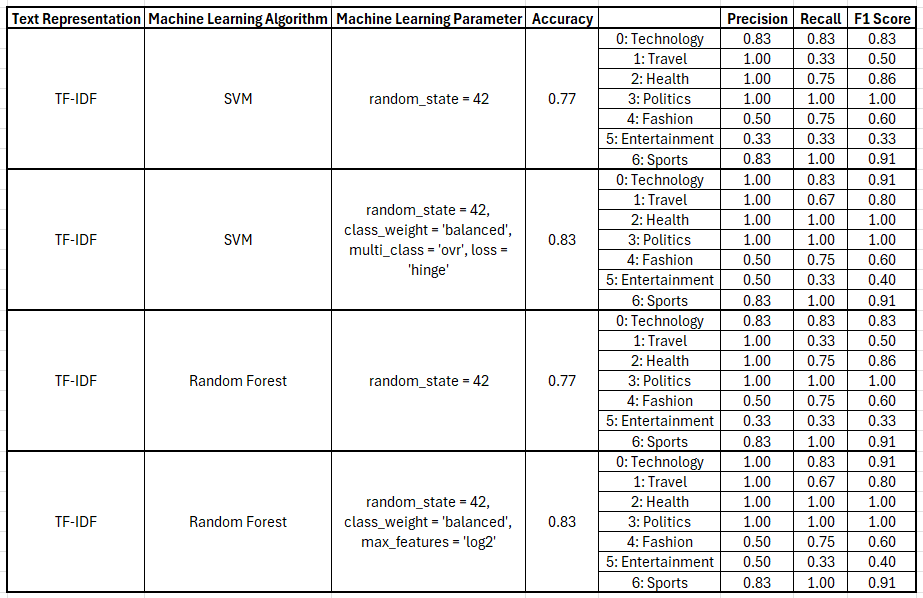
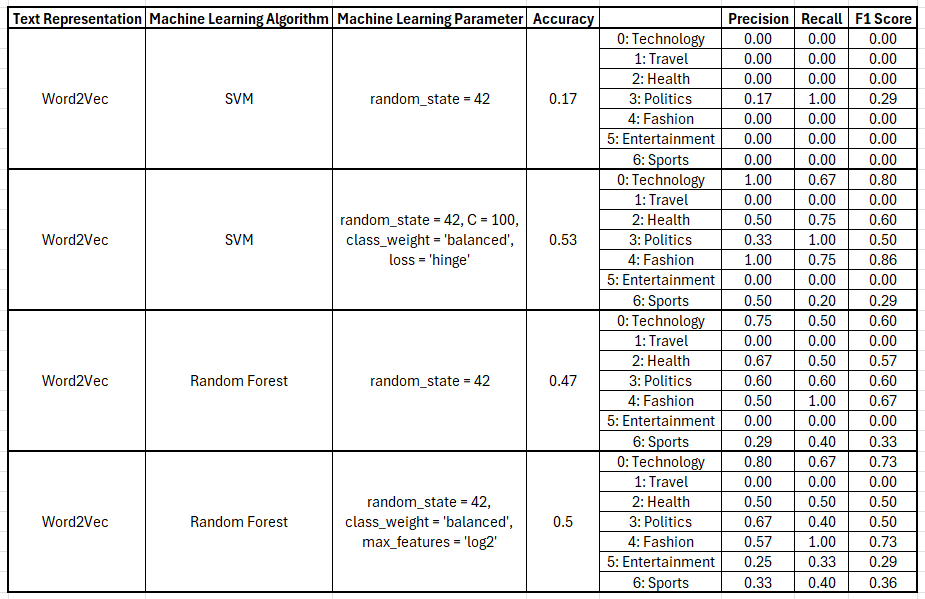
<br>
From all 8 models above, there are two best model TF-IDF/SVM Tuned and TF-IDF/Random Forest Tuned with both accuracy at 83% and also have twinning classification metrics values.
<br> <br>
In more than one occassion, models have shown to struggles in predicting Travel and Entertainment news. This might be because of both news categories have smaller sample size compared to other categories.
<br> <br>
And overall, the models using TF-IDF as the text representation method yield a better performance compared to those using Word2Vec. This might be because TF-IDF is primarily meant for text classification tasks, compared to Word2Vec where it is predominantly used for semantic similarity or word analogy tasks.